#install Astroquery<br>
%pip install astroquery


### Query for Astronomical Survey Images centered on target name

SkyView Query Form:- https://skyview.gsfc.nasa.gov/current/cgi/query.pl

# import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import astropy.units as u

In [3]:
from astroquery.skyview import SkyView

In [4]:
# Get the Andromeda data (M31) from SDSSg Survey using SkyView
hdu=SkyView.get_images("M31","SDSSg")[0][0]

In [5]:
M31_Pixels=hdu.data

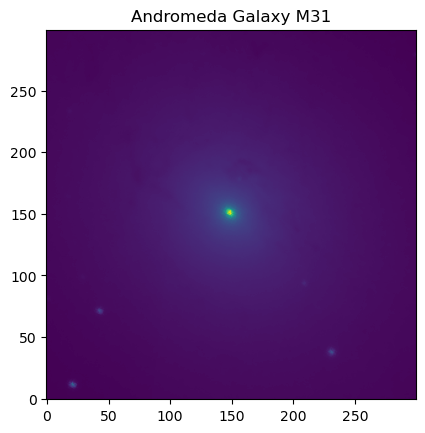

In [6]:
plt.title("Andromeda Galaxy M31")
plt.imshow(M31_Pixels,origin="lower")
plt.show()

In [7]:
# Get the Andromeda data (M31) from SDSSg Survey using SkyView
hdu1=SkyView.get_images("M31","DSS2 Blue",pixels=600,radius=150*u.arcmin)[0][0]
M31_Dss2_Pixels=hdu1.data

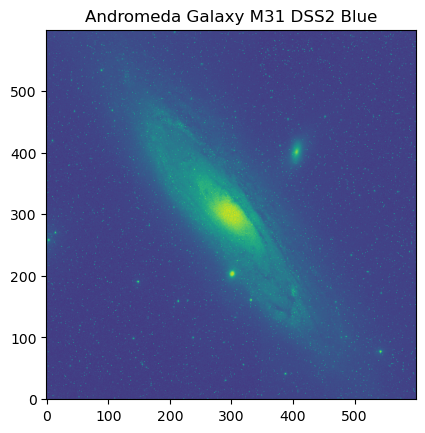

In [8]:
plt.title("Andromeda Galaxy M31 DSS2 Blue")
plt.imshow(M31_Dss2_Pixels,origin="lower")
#plt.imshow(M31_Dss2_Pixels,origin="lower",cmap="gray")
plt.show()

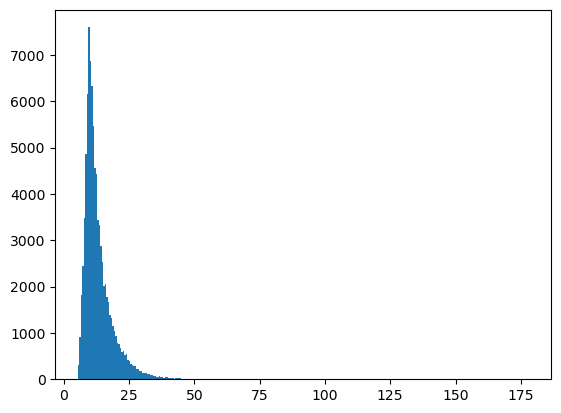

In [9]:
# Get the histogram distribution
plt.hist(M31_Pixels.flat, bins=300)
plt.show()


In [10]:
# A Common Function that will be used to plot the scaled pixel arrays
def plot_pixels(pixel_array, title, color):
  plt.imshow(pixel_array, cmap='gray', origin='lower')
  plt.title(title, color=color, weight='bold')
  plt.axis('off')

In [11]:
# function to compaare pixel after scalingg
def compare_pixels(scaled_array, title):
  plt.subplot(1, 2, 1)
  plot_pixels(M31_Pixels, title='Original Image', color='black')
  plt.subplot(1, 2, 2)
  plot_pixels(scaled_array, title=title, color='royalblue')
  plt.tight_layout()
  plt.show()

### Intensity Normalization Or Linear Scaling Or Min Max Scaling

$$ X_{scaled}=\frac{x - x_{min}}{x_{max} - x_{min}}$$


In [12]:
# Define a function to normalize
def minmax_scaling(pixel_array):
  num = pixel_array - np.min(pixel_array)
  den = np.max(pixel_array) - np.min(pixel_array)
  return num/den

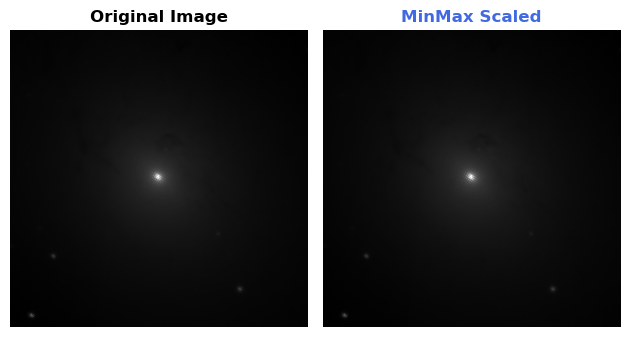

In [13]:
# Nromalize the M31 data and visualize it!
minmax_array = minmax_scaling(M31_Pixels)
compare_pixels(minmax_array, title='MinMax Scaled')

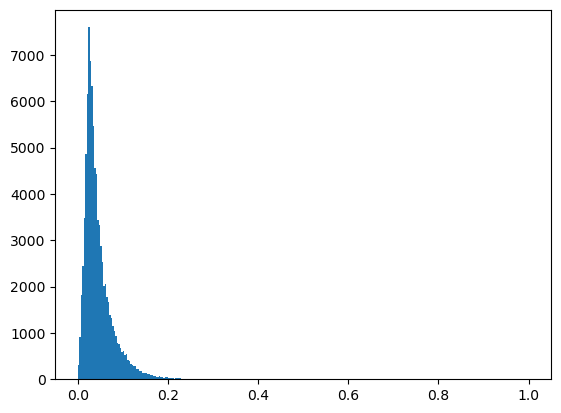

In [14]:
plt.hist(minmax_array.flat, bins=300)
plt.show()


### Standardization Or Z scaling
$$ Z=\frac{x-\mu}{\sigma}$$

In [15]:
# A function to standardize
def zscale(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  return num/den

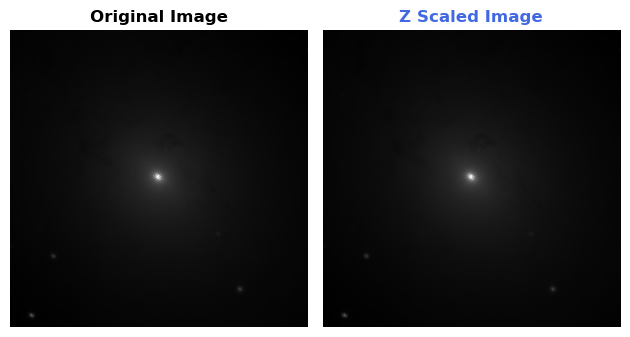

In [16]:
# Visualize the stardidize M31 data
zscaled_array = zscale(M31_Pixels)
compare_pixels(zscaled_array, title='Z Scaled Image')

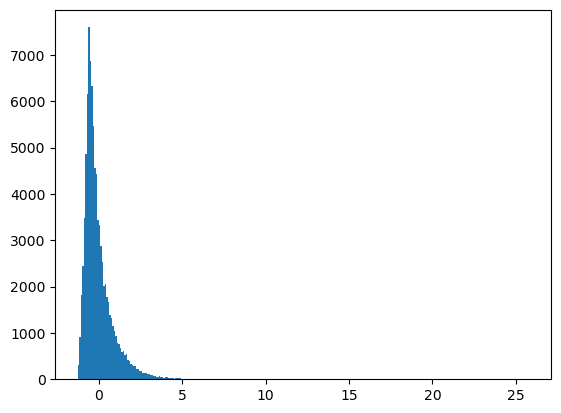

In [17]:
plt.hist(zscaled_array.flat, bins=300)
plt.show()


### Log Normalization
$$ logNormalization=\log(x)$$

In [18]:
# Log Normalization is simply the log of pixels! Create a function for the same!
def log_normalization(pixel_array):
  return np.log(pixel_array)

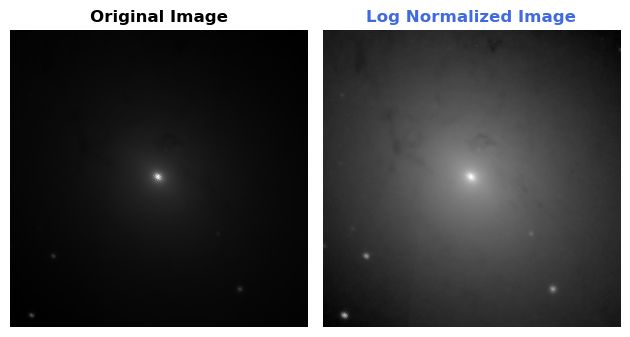

In [19]:
# Visualize the log normalization on M31 data
log_norm_array = log_normalization(M31_Pixels)
compare_pixels(log_norm_array, title='Log Normalized Image')


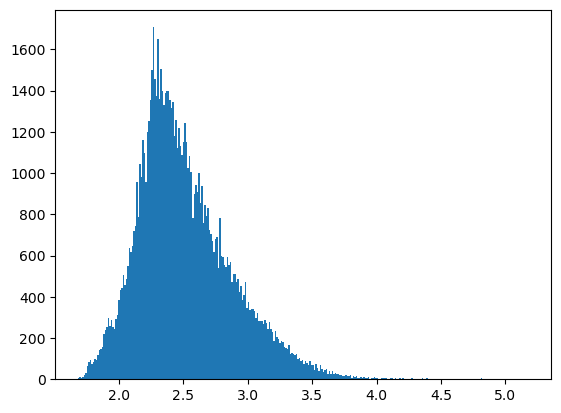

In [20]:
plt.hist(log_norm_array.flat, bins=300)
plt.show()

## Square Root

In [21]:
def sqrt_scaling(pixel_array):
  return np.sqrt(pixel_array)

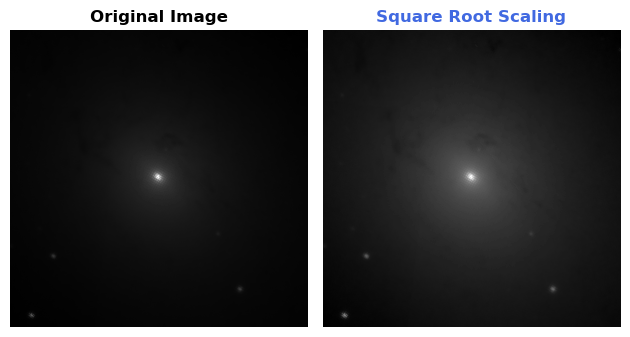

In [22]:
sqrt_array = sqrt_scaling(M31_Pixels)
compare_pixels(sqrt_array, title='Square Root Scaling')

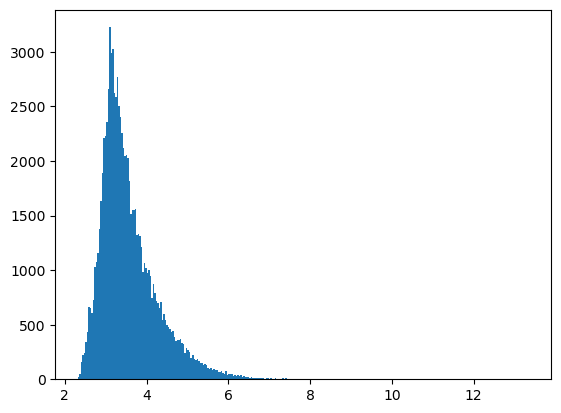

In [23]:
plt.hist(sqrt_array.flat, bins=300)
plt.show()

### ZScaleInterval

In [24]:
# Get the ZScaleInterval from visualization module of astropy
from astropy.visualization import ZScaleInterval

In [25]:
# Create the object for ZScaleInterval
z = ZScaleInterval()
# Get min and max values of the M31 data
z1, z2 = z.get_limits(log_norm_array)
# Check z1 and z2
print(f'Minimum = {z1}')
print(f'Maximum = {z2}')

Minimum = 1.6889997720718384
Maximum = 4.447910199027211


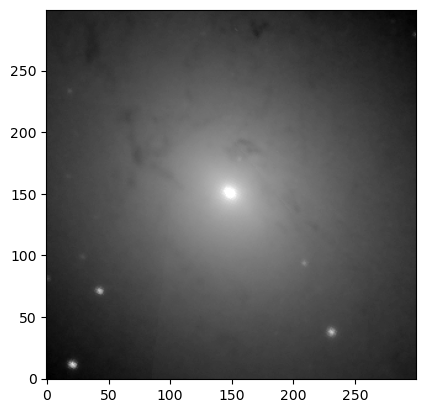

In [26]:
# Plot the M31 data using this interval
img = plt.imshow(log_norm_array, vmin=z1, vmax=z2, cmap='gray', origin='lower')
plt.show()

In [27]:
# Get the array created from the above cell
image_array = img.make_image(renderer=None, unsampled=True)[0]

### Change 4 channel image to  grayscale

In [28]:
#%pip install opencv

In [29]:
# Import cv2 library - doesn't need installation using google colab
import cv2

In [30]:
# Convert 4 channel image to grayscale image
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY)

In [31]:
# Check if channels are set to 3 or 4 now
gray_array.shape

(300, 300)

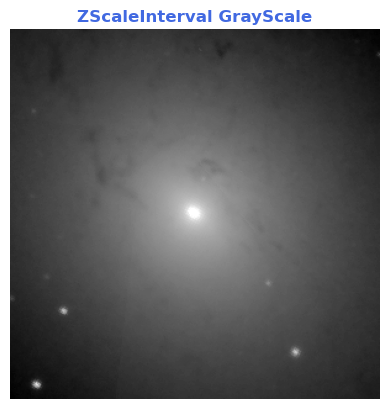

In [32]:
# Visualize it
plot_pixels(gray_array, title='ZScaleInterval GrayScale', color='royalblue')

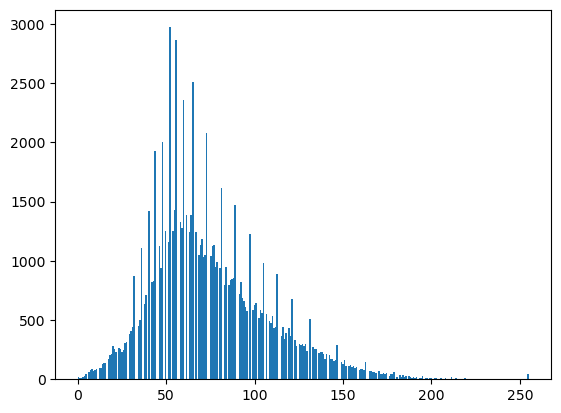

In [33]:
# Histogram Visualization
plt.hist(gray_array.flat, bins=300)
plt.show()